## Doing regression through sklearn

In [1]:
#Import the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [2]:
#Import the dataset
data = pd.read_csv('Mult_Reg_Yield.csv')

In [3]:
#Explore the dataste
data.head()

,Time,Temperature,Yield
0,188,230,84.4
1,190,220,83.3
2,186,235,95.4
3,191,210,98.3
4,178,210,91.4


In [4]:
#Check descriptive summary
data.describe()

,Time,Temperature,Yield
count,16.000000,16.000000,16.000000
mean,163.937500,213.062500,66.981250
std,23.450569,17.650189,23.705336
min,130.000000,176.000000,34.500000
25%,142.000000,203.750000,44.100000
50%,169.500000,214.000000,69.200000
75%,186.500000,226.250000,86.150000
max,194.000000,240.000000,98.300000


In [5]:
#Check structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         16 non-null     int64  
 1   Temperature  16 non-null     int64  
 2   Yield        16 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 512.0 bytes


In [6]:
#Preliminary exploration - Correlation analysis
round(data.corr(),3)

,Time,Temperature,Yield
Time,1.000,-0.008,0.897
Temperature,-0.008,1.000,-0.055
Yield,0.897,-0.055,1.000


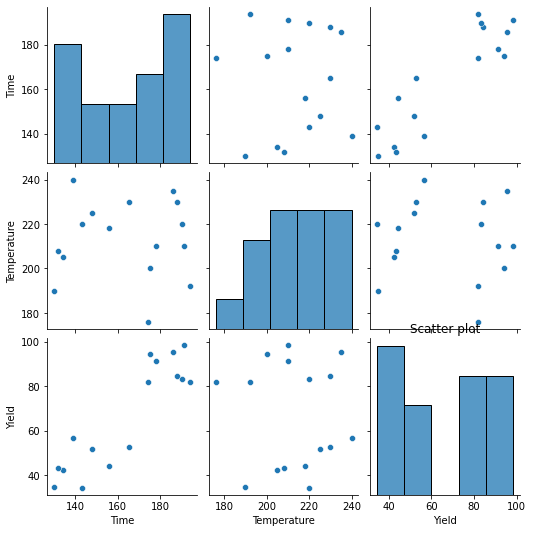

In [7]:
#Preliminary analysis - Scatter plot
sns.pairplot(data)
plt.title('Scatter plot')
plt.grid()
plt.show()

While developing model through sklearn, always separate x and y

In [8]:
#Separate x and y
x = data.iloc[:,0:2]
y = data.Yield

In [9]:
#Develop the regression model
model = LinearRegression()

In [10]:
#Fit the model
model = model.fit(x,y)

In [11]:
#Model intercept
model.intercept_

-67.88435970368458

In [12]:
#Model coefficients
model.coef_

array([ 0.90608862, -0.06418911])

In [13]:
#Model accuracy
rsq = model.score(x,y)

In [14]:
#Check R sq value
rsq

0.8063763881995271

In [15]:
#Compute the predicted values
predy = model.predict(x)

In [16]:
res = y-predy

predy is an array. we have to make it a dataframe to join with mydata.

In [17]:
#Make predy dataframe
predy = pd.DataFrame(predy,columns=['Predicted'])
#Joining the dataframe
result = data.join(predy)

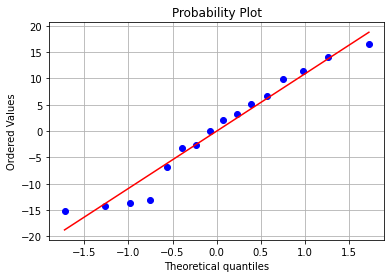

In [18]:
#Normality check of residuals
stats.probplot(x=res,plot=plt)
plt.grid()
plt.show()

In [19]:
#Normality test of the residuals
stats.normaltest(a=res)

/Users/sudiptarakshit/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=1.983548761886913, pvalue=0.3709179570178268)

p value >0.05. Residuals are normally distributed

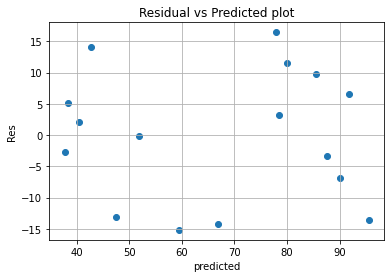

In [20]:
#Residuals vs Predicted plot
plt.scatter(x=predy,y=res)
plt.grid()
plt.title('Residual vs Predicted plot')
plt.xlabel('predicted')
plt.ylabel('Res')
plt.show()

There is no particular trend in Residual vs Predicted plot. So, model adeqacy is okay.

In [21]:
#Mean square error
MSE = mean_squared_error(y,predy)
round(MSE,3)

102.005

In [22]:
#Root mean square error
RMSE = math.sqrt(MSE)
round(RMSE,3)

10.1

**Model Generalizability**

**Cross Validation**

We remove some data and with the remaining data we build model and check the model accuaracy with the left out data. And we do it multiple times

**Leave one out cross validation**

We leave one data and with the remaining data we build model. Then we test the model on the left out data. Take the average of test error.

In [23]:
#Cross-Validation: Model generalizability check
score = cross_val_score(estimator= model,X=x,y=y,scoring='neg_mean_squared_error',cv=4)

In [24]:
#Cross validation MSE
cv_mse = -1*score.mean()
round(cv_mse,3)

172.416

Cross validation residual sum of square\
Cross validation MSE * Number of data points

In [25]:
n = data.Time.count()

In [26]:
#Cross validation residual sum of square
cv_rss = cv_mse*n
round(cv_rss,3)

2758.649

In [27]:
#Total sum of square
Total_SS = y.var()*(n-1)
round(Total_SS,3)

8429.144

In [28]:
#Cross validated R square
cv_rsq = 1- cv_rss/Total_SS
round(cv_rsq,3)

0.673

So, R<sup>2</sup><sub>CV</sub> has decreased from original model R<sup>2</sup>\
When the detoriration is less, which is why the model is acceptable.